In [27]:
import numpy as np
import pandas as pd

In [28]:
df = pd.read_csv('Churn_Modelling.xls')

In [29]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [31]:
df.duplicated().sum()

0

In [32]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [33]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [34]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [35]:
df.drop(['RowNumber','CustomerId','Surname'], inplace=True, axis=1)

In [37]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [39]:
df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [40]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train.shape

(8000, 11)

In [45]:
X_test.shape

(2000, 11)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [49]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [83]:
model = Sequential()

model.add(Dense(11,activation='relu', input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [84]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 11)                132       
                                                                 
 dense_12 (Dense)            (None, 9)                 108       
                                                                 
 dense_13 (Dense)            (None, 1)                 10        
                                                                 
Total params: 382 (1.49 KB)
Trainable params: 382 (1.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [86]:
history = model.fit(X_train,y_train, epochs=200, validation_split=0.2)

Epoch 1/200
200/200 [==============================] - 1s 3ms/step - loss: 679.2551 - accuracy: 0.6195 - val_loss: 1.8661 - val_accuracy: 0.7950
Epoch 2/200
200/200 [==============================] - 0s 2ms/step - loss: 1.2532 - accuracy: 0.7928 - val_loss: 0.6205 - val_accuracy: 0.7969
Epoch 3/200
200/200 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.7934 - val_loss: 0.5827 - val_accuracy: 0.7975
Epoch 4/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.7930 - val_loss: 0.5603 - val_accuracy: 0.7969
Epoch 5/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5522 - accuracy: 0.7934 - val_loss: 0.5407 - val_accuracy: 0.7975
Epoch 6/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7934 - val_loss: 0.5301 - val_accuracy: 0.7969
Epoch 7/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.7934 - val_loss: 0.5198 - val_accuracy: 0.79

Epoch 58/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7936 - val_loss: 0.5056 - val_accuracy: 0.7969
Epoch 59/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7936 - val_loss: 0.5058 - val_accuracy: 0.7969
Epoch 60/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7936 - val_loss: 0.5059 - val_accuracy: 0.7969
Epoch 61/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7936 - val_loss: 0.5058 - val_accuracy: 0.7969
Epoch 62/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7936 - val_loss: 0.5053 - val_accuracy: 0.7969
Epoch 63/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7936 - val_loss: 0.5061 - val_accuracy: 0.7969
Epoch 64/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7936 - val_loss: 0.5067 - val_accuracy:

Epoch 115/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7934 - val_loss: 0.5036 - val_accuracy: 0.7981
Epoch 116/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7934 - val_loss: 0.5036 - val_accuracy: 0.7981
Epoch 117/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7934 - val_loss: 0.5035 - val_accuracy: 0.7981
Epoch 118/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7934 - val_loss: 0.5035 - val_accuracy: 0.7981
Epoch 119/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7934 - val_loss: 0.5035 - val_accuracy: 0.7981
Epoch 120/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7934 - val_loss: 0.5035 - val_accuracy: 0.7981
Epoch 121/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7934 - val_loss: 0.5035 - val_ac

200/200 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7934 - val_loss: 0.5026 - val_accuracy: 0.7981
Epoch 172/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7934 - val_loss: 0.5026 - val_accuracy: 0.7981
Epoch 173/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7934 - val_loss: 0.5025 - val_accuracy: 0.7981
Epoch 174/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7934 - val_loss: 0.5026 - val_accuracy: 0.7981
Epoch 175/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7934 - val_loss: 0.5025 - val_accuracy: 0.7981
Epoch 176/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7934 - val_loss: 0.5025 - val_accuracy: 0.7981
Epoch 177/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7934 - val_loss: 0.5025 - val_accuracy: 0.7981

In [71]:
model.layers[0].get_weights()

[array([[ 0.04357105,  0.06935789, -0.04793604, -0.30008444, -0.04637451,
         -0.07785028,  0.13080655,  0.32187653,  0.3781558 ,  0.5224097 ,
          0.25435364],
        [-0.14927197, -0.16477615,  0.26588833, -0.3534338 ,  0.25815046,
         -0.39300823,  0.02024487,  0.4116395 ,  0.07692131, -0.08955732,
         -0.65569407],
        [ 0.2593249 , -0.11915375,  0.30839854, -0.38547164, -0.08210648,
         -0.46507   ,  0.4213426 , -0.10675867,  0.37833   ,  0.11567666,
         -0.5125144 ],
        [-0.277309  , -0.06923119, -0.31051317,  0.19911206,  0.28394294,
         -0.02162242,  0.29729864,  0.35750702, -0.20082045, -0.33670628,
         -0.19168493],
        [-0.14259636, -0.42973807, -0.52446395, -0.05510976,  0.23519556,
          0.02958792, -0.41905257,  0.46664917,  0.23076661, -0.25568116,
         -0.40807873],
        [ 0.39561993,  0.4565141 , -0.31268427, -0.00232973, -0.11568303,
          0.41402203,  0.05588972, -0.16737965,  0.3820235 , -0.4333568

In [72]:
model.layers[1].get_weights()

[array([[-0.28051513, -0.1846368 , -0.5001893 ,  0.042826  , -0.02227286,
          0.2745933 ,  0.16434675,  0.3623675 , -0.09198415,  0.08962679,
         -0.19375193],
        [-0.4079122 , -0.48733163,  0.3708109 ,  0.06330013,  0.11573107,
          0.24077898,  0.10804987, -0.36961251, -0.08679852, -0.33685517,
         -0.15986452],
        [-0.5219564 ,  0.03872253, -0.04298212, -0.34299654, -0.05921973,
          0.33492666,  0.20369256, -0.5007292 , -0.19752383,  0.32253706,
         -0.26242986],
        [ 0.03483404,  0.41961852, -0.2846121 , -0.19385317,  0.09335392,
         -0.43359002, -0.23865512, -0.43878332,  0.44633585,  0.38401145,
          0.22204103],
        [-0.1444699 , -0.35117003, -0.16614473, -0.23082095,  0.22697997,
         -0.06296858, -0.35118875, -0.20556852, -0.4061831 ,  0.02030421,
          0.4618401 ],
        [ 0.51569766,  0.49398917, -0.090471  , -0.43945444,  0.05665368,
         -0.29746866,  0.4240278 , -0.06191248,  0.2747308 , -0.4521216

In [87]:
pred = model.predict(X_test) 

63/63 [==============================] - 0s 1ms/step


In [88]:
pred = np.where(pred > 0.5,1,0)

In [89]:
pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [90]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,pred)

0.8035

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
history.history

{'loss': [679.255126953125,
  1.253244161605835,
  0.6100001931190491,
  0.5771929621696472,
  0.5522408485412598,
  0.5380106568336487,
  0.5277400016784668,
  0.5208693146705627,
  0.5162742733955383,
  0.5133304595947266,
  0.5115413665771484,
  0.5104833245277405,
  0.5100343823432922,
  0.5094786286354065,
  0.5092007517814636,
  0.5091445446014404,
  0.5091535449028015,
  0.5091016888618469,
  0.5090527534484863,
  0.5090928673744202,
  0.5089921355247498,
  0.5090306401252747,
  0.5091032981872559,
  0.5091309547424316,
  0.5089980363845825,
  0.5091820359230042,
  0.5091297030448914,
  0.5095385313034058,
  0.5090330243110657,
  0.5089578628540039,
  0.5088948607444763,
  0.5091642737388611,
  0.5091139674186707,
  0.5090967416763306,
  0.5091332793235779,
  0.5090909004211426,
  0.5088579058647156,
  0.5092983841896057,
  0.5090582370758057,
  0.5090023279190063,
  0.5090779662132263,
  0.5090318918228149,
  0.5103188157081604,
  0.5089662671089172,
  0.5090059638023376,
  0.5

(0.0, 1.0)

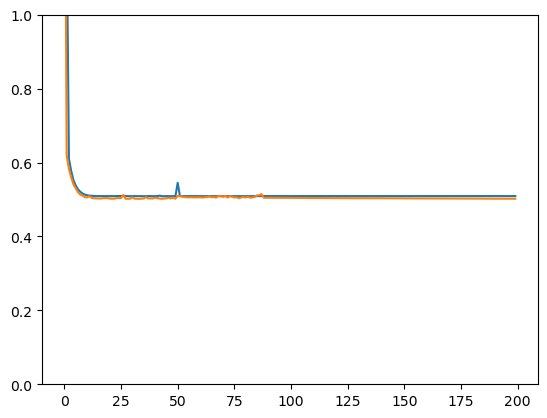

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)

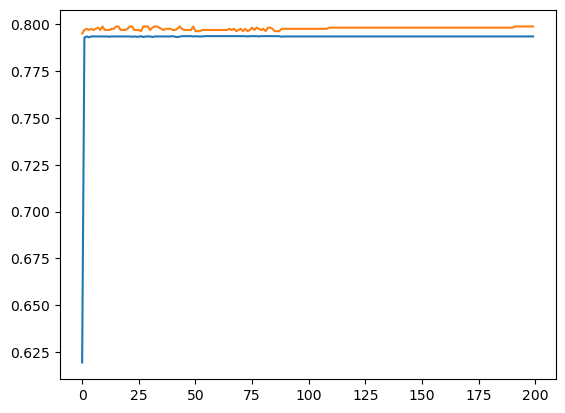

In [96]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])